# All imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm # Gaussian i.e. Normal distribution

# III.1

In [2]:
def bernoulli_mean(p):
    return p

def bernoulli_variance(p):
    return p*(1-p)

# III.4

In [3]:
def random_walk_sample(samples, walk_length):
    walks = np.random.randint(0,2,[samples,walk_length])*2-1 # value 1 is a right step, -1 is a left step. 
    final_step = [sum(x) for x in walks]
    return final_step

In [4]:
def plot_random_walk(samples, walk_length):
    final_step = random_walk_sample(samples=samples,walk_length=walk_length)
    plt.hist(final_step, bins=np.linspace(-walk_length,walk_length,walk_length))

In [5]:
def plot_gaussian(walk_length):
    x = np.linspace(-walk_length,walk_length,walk_length+1)
    y = [norm.pdf(v, scale=math.sqrt(walk_length)) for v in x]
    plt.bar(x,y, width = 2)

In [6]:
samples = 10000
walk_length = 20

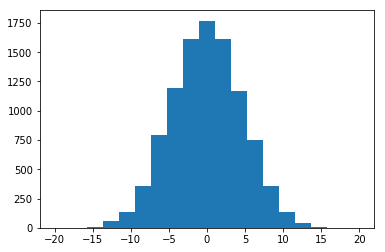

In [7]:
plot_random_walk(samples=samples,walk_length=walk_length)

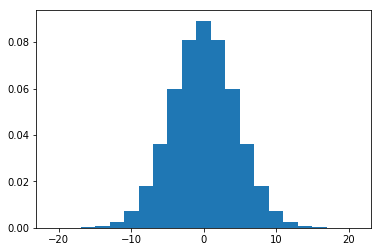

In [8]:
plot_gaussian(walk_length=walk_length)

### Conclusions

The 2 graphs above are very similar, so indeed the Gaussian profile is a good approximation to a Random walk. For a large enough set of samples and random_walks.

**Metric suggestion:** Distance in L2 space between observations and the Guassian distribution.

# III.7

In [9]:
def max_eigenvalue_approximation(A,n):
    B = A
    for x in range(n): # In the end B = A^(32^n) normalized
        B = np.linalg.matrix_power(B,2**3) # B = A^32
        B = np.divide(B,np.linalg.norm(B)) # Normalizes B
    x = np.random.rand(len(A)) # Generates random A
    x = np.matmul(B,x) # Multiplies x by B, i.e. multiplies x by A 2**32 times
    x = np.divide(x,np.linalg.norm(x)) # Normalizes x
    x = np.matmul(A,x) # Calculates Ax
    eigenvalue = np.linalg.norm(x)
    print("Largest Eigenvalue: " + str(eigenvalue))
    return eigenvalue # This value approximates the max eigenvalue from below

In [10]:
max_eigenvalue_approximation([[1,0],[1,2]],2)

Largest Eigenvalue: 2.0


2.0

# III.8

In [12]:
def return_eigenvalues(A):
    return np.linalg.eigvals(A)

In [13]:
def generate_random_symmetric_bernoulli_matrix(n):
    A = np.random.randint(0,2,[n,n]) # Generates a random (non symmetric) bernoulli matrix
    for i in range(n):
        for j in range(i):
            value = A[i][j]^A[j][i] # Xors the 2 symetric entries so that value is uniform on {0,1}, i.e. the probabilities remain correct.
            A[i][j] = value
            A[j][i] = value
    return A # Returns the new

In [14]:
def iii8_answer():
    A = generate_random_symmetric_bernoulli_matrix(1000)
    return return_eigenvalues(A)

In [15]:
# n is the number of mattrices being run.
# Higher n means waiting for longer, but with more statistical accuracy
def eigenvalue_analysis(n):
    observed = [iii8_answer() for _ in range(n)]
    observed = np.concatenate(observed)
    plt.hist(observed,bins=np.linspace(-35,35,71))
    return observed

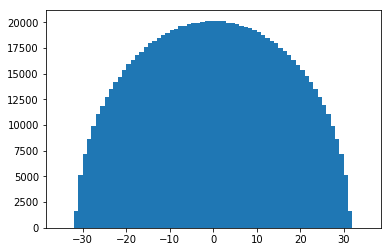

In [16]:
observed = eigenvalue_analysis(1000)

The distribution seems to follow a half ellipse with x-radius of sqrt(1000). The sqrt(1000) limit makes sense since that's the maximum possible eigenvalue for a 1000-sided matrix of zeroes and ones.